In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import os
X_train = pd.read_csv('/home/iotadmin/notebooks/vehicle/train1_save.csv', index_col = 'Seq')
X_test = pd.read_csv('/home/iotadmin/notebooks/vehicle/test1_save.csv', index_col = 'Seq')

In [3]:
len(X_test)+len(X_train)

6243442

In [2]:
output = []
for i in range(len(X_test.columns)):
    if 'FX' in X_test.columns[i]:
        if X_test.columns[i] == 'FLLCABFX' or X_test.columns[i] == 'FRLCABFX':
            continue
        output.append(X_test.columns[i])
    if 'FY' in X_test.columns[i]:
        if X_test.columns[i] == 'FLLCABFY' or X_test.columns[i] == 'FRLCABFY':
            continue
        output.append(X_test.columns[i])
    if 'FZ' in X_test.columns[i]:
        output.append(X_test.columns[i])
    if 'MX' in X_test.columns[i]:
        output.append(X_test.columns[i])
    if 'MY' in X_test.columns[i]:
        output.append(X_test.columns[i])
    if 'MZ' in X_test.columns[i]:
        output.append(X_test.columns[i])

In [3]:
Y_train = X_train[output]
Y_test = X_test[output]

In [4]:
X_train.drop(output, axis = 1, inplace = True)
X_test.drop(output, axis = 1, inplace = True)

In [5]:
X_train.iloc[:,1:]

,FLSD,FLSARF,FLSBLF,FLLCABFX,FLLCABFY,FLTBF,FRSD,FRSARF,FRSBLF,FRLCABFX,...,Rolling,VS,BRAKE_ACT,SAS_Angle,SAS_Speed,PV_AV_CAN,WHL_SPD_FL,WHL_SPD_FR,WHL_SPD_RL,WHL_SPD_RR
Seq,,,,,,,,,,,,,,,,,,,,,
1,372.6121,36.09568,11.81245,8.626451,53.37256,-12.73045,345.5753,-17.87089,-13.148880,21.09548,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
2,372.6485,38.59799,11.81245,9.122523,51.77925,-12.11974,345.5546,-16.98529,-13.117620,21.43836,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
3,372.6453,38.67199,11.77457,8.143878,54.64788,-13.07198,345.5649,-16.80498,-13.117620,20.96861,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
4,372.6089,35.77834,11.77457,7.475699,56.10105,-13.42798,345.5753,-17.88398,-13.137620,20.61201,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
5,372.6121,35.69305,11.81245,8.369979,53.34180,-12.80715,345.5753,-18.12973,-13.117620,21.26349,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,372.4264,-30.67907,-13.18792,41.692680,73.98440,-63.11776,341.3520,-39.66893,-2.440982,41.69268,...,-3.231516,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0
437380,372.4044,-33.10487,-13.20762,41.325790,76.47108,-63.48824,341.3623,-40.88317,-2.398480,41.32579,...,-3.224485,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0
437381,372.3910,-34.37798,-13.20308,41.857260,74.24006,-63.44627,341.3623,-41.78622,-2.398480,41.85726,...,-3.224485,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.iloc[:,1:].mean()
STD = X_train.iloc[:,1:].std()
X_test.iloc[:,1:] = (X_test.iloc[:,1:] - MEAN) / (STD + 1e-07)

In [7]:
X_train

,Time,FLSD,FLSARF,FLSBLF,FLLCABFX,FLLCABFY,FLTBF,FRSD,FRSARF,FRSBLF,...,Rolling,VS,BRAKE_ACT,SAS_Angle,SAS_Speed,PV_AV_CAN,WHL_SPD_FL,WHL_SPD_FR,WHL_SPD_RL,WHL_SPD_RR
Seq,,,,,,,,,,,,,,,,,,,,,
1,0.00,372.6121,36.09568,11.81245,8.626451,53.37256,-12.73045,345.5753,-17.87089,-13.148880,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.01,372.6485,38.59799,11.81245,9.122523,51.77925,-12.11974,345.5546,-16.98529,-13.117620,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
3,0.02,372.6453,38.67199,11.77457,8.143878,54.64788,-13.07198,345.5649,-16.80498,-13.117620,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
4,0.03,372.6089,35.77834,11.77457,7.475699,56.10105,-13.42798,345.5753,-17.88398,-13.137620,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
5,0.04,372.6121,35.69305,11.81245,8.369979,53.34180,-12.80715,345.5753,-18.12973,-13.117620,...,-2.323607,0.0,2.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,4373.78,372.4264,-30.67907,-13.18792,41.692680,73.98440,-63.11776,341.3520,-39.66893,-2.440982,...,-3.231516,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0
437380,4373.79,372.4044,-33.10487,-13.20762,41.325790,76.47108,-63.48824,341.3623,-40.88317,-2.398480,...,-3.224485,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0
437381,4373.80,372.3910,-34.37798,-13.20308,41.857260,74.24006,-63.44627,341.3623,-41.78622,-2.398480,...,-3.224485,0.0,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_test

,Time,FLSD,FLSARF,FLSBLF,FLLCABFX,FLLCABFY,FLTBF,FRSD,FRSARF,FRSBLF,...,Rolling,VS,BRAKE_ACT,SAS_Angle,SAS_Speed,PV_AV_CAN,WHL_SPD_FL,WHL_SPD_FR,WHL_SPD_RL,WHL_SPD_RR
Seq,,,,,,,,,,,,,,,,,,,,,
1,0.00,-0.298846,0.539538,1.095123,-0.468071,-1.446254,7.709840,0.097991,0.464167,0.079073,...,-0.806964,-1.606445,2.594652,1.460018,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
2,0.01,-0.302765,0.482597,1.091486,-0.479108,-1.394508,7.678611,0.097991,0.409302,0.072985,...,-0.806964,-1.606445,2.594652,1.460018,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
3,0.02,-0.301359,0.478770,1.097888,-0.462861,-1.438133,7.714323,0.097991,0.402007,0.076760,...,-0.806964,-1.606445,2.594652,1.460018,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
4,0.03,-0.298406,0.547348,1.089158,-0.448462,-1.487891,7.745920,0.097991,0.442318,0.077977,...,-0.806964,-1.606445,2.594652,1.460018,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
5,0.04,-0.298193,0.545263,1.098761,-0.463085,-1.419744,7.701757,0.097991,0.446635,0.077612,...,-0.806964,-1.606445,2.594652,1.460018,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138942,1389.41,0.120867,-0.070318,0.153083,-0.183684,-0.455974,2.565062,0.584050,-0.183452,0.426082,...,-0.848328,-1.606445,2.594652,1.459853,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
138943,1389.42,0.120867,-0.070318,0.153083,-0.183684,-0.455974,2.565062,0.584050,-0.183452,0.426082,...,-0.848439,-1.606445,2.594652,1.459853,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902
138944,1389.43,0.120867,-0.070318,0.153083,-0.183684,-0.455974,2.565062,0.584050,-0.183452,0.426082,...,-0.848439,-1.606445,2.594652,1.459853,-0.421824,-0.716612,-1.62086,-1.620787,-1.619505,-1.619902


In [ ]:
X_te

In [ ]:
interval = 200
sequence = np.empty((0, interval, 42))
target = np.empty((0,))
concat = pd.concat([X_test, Y_test], axis = 1)
def convert_to_timeseries_s(df, interval):
    sequence_list = []
    
    for i in tqdm(range(0,df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-24]))
    
    sequence = np.array(sequence_list)
    
    return sequence
start = 0
for i in range(X_test.shape[0]):
    if i != 0:     
        if X_test['Time'].values[i] == 0:
            _sequence = convert_to_timeseries_s(concat.iloc[start:i,:],interval)
            sequence = np.vstack((sequence, _sequence))
            start = i
        if i == (X_test.shape[0] - 1):
            _sequence = convert_to_timeseries_s(concat.iloc[start:i+1,:],interval)
            sequence = np.vstack((sequence, _sequence))
            
            start = i
np.save('/home/iotadmin/notebooks/array/test_window_200_s',sequence)

100%|██████████| 138746/138746 [00:48<00:00, 2850.16it/s]


In [9]:
interval = 200
def convert_to_timeseries_s(df, interval):
    sequence_list = []
    
    for i in tqdm(range(0,df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-24]))
    
    sequence = np.array(sequence_list)
    
    return sequence

def convert_to_timeseries_t(df, interval, f_num):
    target_list = []
    
    for i in tqdm(range(0,df.shape[0] - interval)):
        target_list.append(df.iloc[i+interval,-24+f_num:-23 + f_num])
    
    target = np.array(target_list)
    
    return target

sequence = np.empty((0, interval, 42))
target = np.empty((0,))
concat = pd.concat([X_test, Y_test], axis = 1)
start = 0

for i in range(X_test.shape[0]):
    if i != 0:     
        if X_test['Time'].values[i] == 0:
            _sequence = convert_to_timeseries_s(concat.iloc[start:i,:],interval)
            sequence = np.vstack((sequence, _sequence))
            start = i
        if i == (X_test.shape[0] - 1):
            _sequence = convert_to_timeseries_s(concat.iloc[start:i+1,:],interval)
            sequence = np.vstack((sequence, _sequence))
            
            start = i
np.save('/home/iotadmin/notebooks/array/test_window_200_s',sequence)

for j in range(24):
    target = np.empty((0,))
    start = 0
    for i in range(X_test.shape[0]):
        if i != 0:
            if X_test['Time'].values[i] == 0:
                _target = convert_to_timeseries_t(concat.iloc[start:i,:],interval,j)
                _target = _target.reshape(_target.shape[0],)
                target = np.hstack((target, _target))
                start = i
            if i == (X_test.shape[0] - 1):
                _target = convert_to_timeseries_t(concat.iloc[start:i+1,:],interval,j)
                _target = _target.reshape(_target.shape[0],)
                target = np.hstack((target, _target))
                start = i
    np.save('/home/iotadmin/notebooks/array/test_window_200_t_%d' % (j+1),target)


100%|██████████| 222027/222027 [00:57<00:00, 3889.61it/s]


ValueError: cannot reshape array of size 0 into shape (222027,)

In [15]:
interval = 200
def convert_to_timeseries_t_last(df, interval):
    target_list = []
    
    for i in tqdm(range(0,df.shape[0] - interval)):
        target_list.append(df.iloc[i+interval,-1:])
    
    target = np.array(target_list)
    
    return target

target = np.empty((0,))
start = 0
for i in range(X_test.shape[0]):
    if i != 0:     
        if X_test['Time'].values[i] == 0:
            _target = convert_to_timeseries_t_last(concat.iloc[start:i,:],interval)
            _target = _target.reshape(_target.shape[0],)
            target = np.hstack((target, _target))
            start = i
        if i == (X_test.shape[0] - 1):
            _target = convert_to_timeseries_t_last(concat.iloc[start:i+1,:],interval)
            _target = _target.reshape(_target.shape[0],)
            target = np.hstack((target, _target))
            start = i
np.save('/home/iotadmin/notebooks/array/test_window_200_t_%d' % (24),target)


 53%|█████▎    | 117373/222027 [00:28<00:24, 4295.35it/s]


100%|██████████| 222027/222027 [00:53<00:00, 4147.33it/s]

  9%|▊         | 11799/138746 [00:02<00:29, 4371.24it/s]


 93%|█████████▎| 129532/138746 [00:30<00:02, 4323.64it/s]


100%|██████████| 138746/138746 [00:32<00:00, 4232.99it/s]


In [25]:
target.shape

(1722717,)

In [26]:
s = np.load('/home/iotadmin/notebooks/array/test_window_50_t_23.npy')

In [27]:
s.shape

(1722717,)

In [38]:
 _sequence.shape

(222177, 50, 43)

In [39]:
sequence.shape

(0, 50, 42)

In [24]:
i

1723166

In [19]:
X_test.shape

(1723167, 43)

In [162]:
def convert_to_timeseries_t(df, interval, f_num):
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        target_list.append(df.iloc[i+interval,-24:(-23 + f_num)])
    
    target = np.array(target_list)
    
    return target

In [166]:
target = np.empty((0,))
for j in range(24):
    start = 0
    for i in range(X_test.shape[0]):
        if i != 0:     
            if X_test['Time'].values[i] == 0:
                _target = convert_to_timeseries_t(concat.iloc[start:i,:],interval,j)
                _target = _target.reshape(X_test.shape[0]- interval,)
                target = np.hstack((target, _target))
                start = i
            if i == (X_test.shape[0] - 1):
                _target = convert_to_timeseries_t(concat.iloc[start:i+1,:],interval,j)
                _target = _target.reshape(X_test.shape[0]- interval,)
                target = np.hstack((target, _target))
                start = i
    np.save('C:/hdata/window_50_t_%d' % (j+1),target)

 34%|████████████████████████▍                                                | 74537/222177 [00:09<00:19, 7606.00it/s]


KeyboardInterrupt: 

In [159]:
target.shape

(0,)

In [150]:
np.save('C:/hdata/window_50_s',sequence)

In [152]:
sequence = np.load('C:/hdata/window_50_s.npy')

In [146]:
_target.shape

(222177, 1)

In [121]:
target = np.empty((0,1))

In [122]:
target_list = []

In [123]:
target_list.append(concat.iloc[0:50,-24:-23])

In [125]:
targets = np.array(target_list)

ValueError: cannot copy sequence with size 50 to array axis with dimension 1

In [110]:
target_list

[FLFX    97.99587
 Name: 51, dtype: float64]

In [132]:
concat.iloc[0:50,-24:-23].values.shape

(50, 1)

In [136]:
target = concat.iloc[0:50,-24:-23].values.reshape(50,)

In [143]:
X_train.shape[0]

222227

In [32]:
from tensorflow.keras.layers import LSTM, RNN, Input, Dense
from tensorflow.keras.models import Model


n_inputs = 42
n_hiddens = 128
n_outputs = 1

inputs = Input(shape=(X_train.shape[0], n_inputs))
hidden = LSTM(n_hiddens)(inputs)
output = Dense(n_outputs,activation='relu')(hidden)

model = Model(inputs,output)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 222227, 42)]      0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               87552     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 87,681
Trainable params: 87,681
Non-trainable params: 0
_________________________________________________________________


In [35]:
inputs.shape

TensorShape([Dimension(None), Dimension(222227), Dimension(42)])

In [33]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history = model.fit(X_train, Y_train, epochs= 20, batch_size=42,validation_data=(X_test,Y_test))

ValueError: Error when checking input: expected input_14 to have 3 dimensions, but got array with shape (222227, 42)

In [104]:
X_test.iloc[:,0]

array([-0.32462193, -0.33244494, -0.32543551, ..., -0.49985887,
       -0.51081118, -0.52038664])

In [98]:
X_test

,FLFX,FLFY,FLFZ,FLMX,FLMY,FLMZ,FRFX,FRFY,FRFZ,FRMX,...,RLFZ,RLMX,RLMY,RLMZ,RRFX,RRFY,RRFZ,RRMX,RRMY,RRMZ
Seq,,,,,,,,,,,,,,,,,,,,,
1,-0.324622,-0.267087,0.294944,-0.393559,0.299348,-0.246807,0.512017,0.933616,-0.235261,0.540000,...,0.087176,-0.416302,-0.248982,-0.240989,0.627977,1.319137,-0.224380,0.601136,0.173615,-0.635808
2,-0.332445,-0.260147,0.299563,-0.387643,0.286045,-0.249319,0.512209,0.947702,-0.225987,0.523042,...,0.081677,-0.414037,-0.285866,-0.240989,0.636512,1.327087,-0.227091,0.600855,0.182352,-0.625309
3,-0.325436,-0.264677,0.299563,-0.380292,0.301565,-0.249319,0.514837,0.918356,-0.221754,0.523225,...,0.085086,-0.408960,-0.306613,-0.231206,0.608728,1.314209,-0.214937,0.588850,0.197018,-0.669825
4,-0.316236,-0.254170,0.284872,-0.374377,0.310254,-0.246807,0.505030,0.911606,-0.222564,0.522676,...,0.095423,-0.406423,-0.306613,-0.206591,0.591658,1.303239,-0.196268,0.572999,0.215429,-0.688304
5,-0.319114,-0.244242,0.276461,-0.369898,0.288202,-0.239272,0.504774,0.917671,-0.224003,0.514136,...,0.084534,-0.400440,-0.317275,-0.205329,0.600738,1.299264,-0.195835,0.574125,0.243825,-0.677805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222223,-0.502425,-1.165774,0.257149,-0.421354,0.355196,-0.187430,0.520477,-0.933841,0.027365,-0.284040,...,-0.022806,-0.376328,-0.546937,0.811151,-0.635754,-0.824666,0.067913,0.038387,0.758704,-0.419104
222224,-0.508057,-1.190644,0.257981,-0.417277,0.373173,-0.195970,0.526438,-0.957904,0.023673,-0.274341,...,-0.020716,-0.364726,-0.517257,0.822197,-0.642110,-0.835159,0.057819,0.042515,0.713770,-0.404825
222225,-0.499859,-1.170787,0.251049,-0.426753,0.383240,-0.199386,0.523041,-0.951253,0.012685,-0.271657,...,-0.024896,-0.364453,-0.493916,0.840816,-0.647194,-0.847084,0.060530,0.038106,0.673828,-0.425823


In [39]:
target

array([[ 9.426270e+01,  2.164768e+02,  4.928638e+03, ..., -3.357042e+02,
        -1.358976e+00,  1.250442e+01],
       [ 9.706258e+01,  2.124916e+02,  4.928862e+03, ..., -3.362864e+02,
        -1.095045e+00,  1.213047e+01],
       [ 1.026623e+02,  2.156050e+02,  4.924086e+03, ..., -3.364730e+02,
        -1.886838e+00,  1.177896e+01],
       ...,
       [-1.866588e+00, -7.238725e+01,  4.900878e+03, ..., -3.829608e+02,
         1.556428e+01,  1.568294e+01],
       [-8.399646e+00, -7.238725e+01,  4.901812e+03, ..., -3.812589e+02,
         1.500474e+01,  1.661780e+01],
       [-1.411141e+01, -7.578089e+01,  4.906587e+03, ..., -3.816321e+02,
         1.365342e+01,  1.755266e+01]])

In [11]:
X_test

,FLFX,FLFY,FLFZ,FLMX,FLMY,FLMZ,FRFX,FRFY,FRFZ,FRMX,...,RLFZ,RLMX,RLMY,RLMZ,RRFX,RRFY,RRFZ,RRMX,RRMY,RRMZ
Seq,,,,,,,,,,,,,,,,,,,,,
1,102.662300,219.49680,4918.602,-566.7542,0.792747,-7.650919,-67.14403,473.7990,4515.575,-465.5196,...,2963.053,-372.9226,-3.246901,-23.736120,184.89390,211.2192,3005.174,-338.1525,-1.358976,11.94350
2,97.995870,221.73850,4920.467,-565.9855,-1.553783,-7.837527,-67.03212,478.2802,4519.418,-467.5952,...,2961.190,-372.7361,-4.600883,-23.736120,186.64960,212.7725,3004.241,-338.1749,-1.063373,12.13047
3,102.177000,220.27520,4920.467,-565.0303,1.183835,-7.837527,-65.50273,468.9443,4521.172,-467.5728,...,2962.345,-372.3182,-5.362497,-23.504320,180.93420,210.2562,3008.423,-339.1303,-0.567183,11.33771
4,107.664800,223.66880,4914.535,-564.2617,2.716478,-7.650919,-71.20998,466.7970,4520.836,-467.6400,...,2965.847,-372.1093,-5.362497,-22.921080,177.42280,208.1126,3014.846,-340.3918,0.055694,11.00864
5,105.947500,226.87560,4911.139,-563.6797,-1.173265,-7.091096,-71.35918,468.7264,4520.240,-468.6853,...,2962.158,-371.6168,-5.753882,-22.891170,179.29060,207.3360,3014.995,-340.3022,1.016403,11.19561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222223,-3.397190,-70.76826,4903.341,-570.3658,10.643940,-3.239511,-62.22013,-120.3091,4624.396,-566.3809,...,2925.793,-369.6319,-14.184530,1.193741,-75.06071,-207.6747,3105.740,-382.9384,18.435840,15.80260
222224,-6.757049,-78.80091,4903.677,-569.8360,13.814930,-3.873978,-58.75103,-127.9646,4622.866,-565.1938,...,2926.501,-368.6768,-13.095000,1.455452,-76.36814,-209.7250,3102.267,-382.6099,16.915600,16.05688
222225,-1.866588,-72.38725,4900.878,-571.0673,15.590680,-4.127764,-60.72805,-125.8485,4618.313,-564.8652,...,2925.085,-368.6544,-12.238180,1.896622,-77.41408,-212.0550,3103.200,-382.9608,15.564280,15.68294


In [30]:
concat.iloc[24,-24:]

FLFX      94.262700
FLFY     216.476800
FLFZ    4928.638000
FLMX    -568.433100
FLMY      -0.264249
FLMZ      -8.374957
FRFX     -62.481250
FRFY     480.116300
FRFZ    4518.374000
FRMX    -466.101900
FRMY      -4.496175
FRMZ      22.395530
RLFX    -123.211300
RLFY     345.939500
RLFZ    2960.146000
RLMX    -374.206000
RLMY      -3.511351
RLMZ     -24.483870
RRFX     191.431000
RRFY     218.985700
RRFZ    2994.905000
RRMX    -335.704200
RRMY      -1.358976
RRMZ      12.504420
Name: 25, dtype: float64

In [35]:
target.shape

(222203, 24)

In [36]:
sequence.shape

(222203, 24, 42)

In [33]:
concat.shape

(222227, 66)

In [40]:
X_test

,FLFX,FLFY,FLFZ,FLMX,FLMY,FLMZ,FRFX,FRFY,FRFZ,FRMX,...,RLFZ,RLMX,RLMY,RLMZ,RRFX,RRFY,RRFZ,RRMX,RRMY,RRMZ
Seq,,,,,,,,,,,,,,,,,,,,,
1,102.662300,219.49680,4918.602,-566.7542,0.792747,-7.650919,-67.14403,473.7990,4515.575,-465.5196,...,2963.053,-372.9226,-3.246901,-23.736120,184.89390,211.2192,3005.174,-338.1525,-1.358976,11.94350
2,97.995870,221.73850,4920.467,-565.9855,-1.553783,-7.837527,-67.03212,478.2802,4519.418,-467.5952,...,2961.190,-372.7361,-4.600883,-23.736120,186.64960,212.7725,3004.241,-338.1749,-1.063373,12.13047
3,102.177000,220.27520,4920.467,-565.0303,1.183835,-7.837527,-65.50273,468.9443,4521.172,-467.5728,...,2962.345,-372.3182,-5.362497,-23.504320,180.93420,210.2562,3008.423,-339.1303,-0.567183,11.33771
4,107.664800,223.66880,4914.535,-564.2617,2.716478,-7.650919,-71.20998,466.7970,4520.836,-467.6400,...,2965.847,-372.1093,-5.362497,-22.921080,177.42280,208.1126,3014.846,-340.3918,0.055694,11.00864
5,105.947500,226.87560,4911.139,-563.6797,-1.173265,-7.091096,-71.35918,468.7264,4520.240,-468.6853,...,2962.158,-371.6168,-5.753882,-22.891170,179.29060,207.3360,3014.995,-340.3022,1.016403,11.19561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222223,-3.397190,-70.76826,4903.341,-570.3658,10.643940,-3.239511,-62.22013,-120.3091,4624.396,-566.3809,...,2925.793,-369.6319,-14.184530,1.193741,-75.06071,-207.6747,3105.740,-382.9384,18.435840,15.80260
222224,-6.757049,-78.80091,4903.677,-569.8360,13.814930,-3.873978,-58.75103,-127.9646,4622.866,-565.1938,...,2926.501,-368.6768,-13.095000,1.455452,-76.36814,-209.7250,3102.267,-382.6099,16.915600,16.05688
222225,-1.866588,-72.38725,4900.878,-571.0673,15.590680,-4.127764,-60.72805,-125.8485,4618.313,-564.8652,...,2925.085,-368.6544,-12.238180,1.896622,-77.41408,-212.0550,3103.200,-382.9608,15.564280,15.68294


In [15]:
X_train.shape

(222227, 66)

In [24]:
sequence.shape

(222180, 47, 42)

In [38]:
finetune = model.predict(sequence,batch_size=42)

In [37]:
sequence.shape

(222180, 47, 42)

In [42]:
finetune[0]

array([ 8.2919785e+01,  2.3243205e+02,  4.9029316e+03, -5.6736279e+02,
        1.7752695e+01, -4.4663787e+00, -1.0554524e+02,  4.6245670e+02,
        4.5061069e+03, -4.7148282e+02, -3.7720455e+01,  2.4982876e+01,
       -1.0772600e+02,  3.2765231e+02,  2.9572615e+03, -3.6318329e+02,
        1.0120506e+01, -1.9342964e+01,  1.8749136e+02,  1.7039389e+02,
        3.0284417e+03, -3.4545413e+02, -1.2546001e+01,  2.3320156e+01],
      dtype=float32)

In [48]:
fx = []

In [49]:
for i in range(finetune.shape[0]):
    fx.append(finetune[i][0])

In [50]:
fx

[82.919785,
 75.84997,
 89.8822,
 92.994865,
 82.404434,
 75.751724,
 88.78427,
 92.31657,
 79.176384,
 76.47586,
 90.070015,
 92.75839,
 75.70043,
 76.14568,
 95.11182,
 90.69518,
 72.379875,
 80.19501,
 95.719475,
 86.86,
 75.42733,
 85.14154,
 95.41514,
 89.235214,
 75.91789,
 84.93592,
 100.2813,
 89.48796,
 73.2694,
 90.372154,
 100.07298,
 83.72262,
 75.85069,
 92.998085,
 96.13532,
 81.79486,
 76.6846,
 90.0019,
 93.62209,
 79.90169,
 76.205894,
 92.15198,
 96.33279,
 78.72632,
 79.30805,
 98.16015,
 93.56528,
 76.465675,
 84.70361,
 98.74088,
 90.80444,
 77.49172,
 88.9081,
 97.7545,
 90.38619,
 79.0759,
 88.949875,
 99.50561,
 89.67093,
 76.524864,
 93.81054,
 100.52219,
 84.57078,
 79.852425,
 98.551865,
 96.50695,
 82.98436,
 84.80566,
 94.54486,
 93.56154,
 80.1626,
 82.89462,
 96.33505,
 93.624466,
 76.55364,
 84.384415,
 99.01941,
 89.612885,
 76.256676,
 90.35557,
 99.1167,
 86.58659,
 80.06594,
 92.60928,
 97.07167,
 86.82042,
 83.04308,
 93.957985,
 96.65957,
 83.45090

In [53]:
fx_2 = []
for i in range(target.shape[0]):
    fx_2.append(target[i][0])

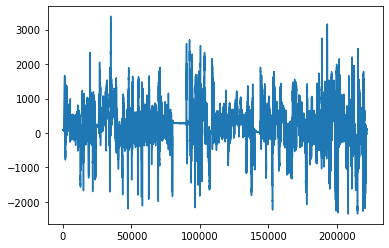

In [58]:
plt.plot(fx)

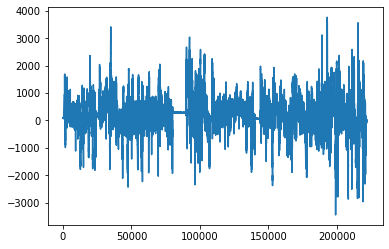

In [59]:
plt.plot(fx_2)

In [57]:
np.corrcoef(fx,fx_2)

array([[1.        , 0.98602541],
       [0.98602541, 1.        ]])

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

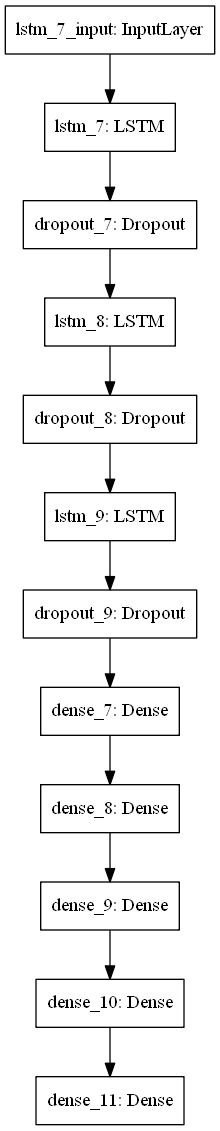

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


In [28]:
fx

NameError: name 'fx' is not defined